### Fault-Toletant Quantum Computing

In fault-tolerant quantum computing, ensuring the accuracy of quantum operations is essential, especially in the presence of noise and errors. One of the foundational techniques used to protect quantum information is quantum error correction, specifically the repetition code. This code is an elegant method of encoding a logical qubit across multiple physical qubits to detect and correct errors that may occur during computation.

The process begins with the encoding of a logical qubit into multiple physical qubits. In a typical example, a single qubit is encoded into three physical qubits. This redundancy allows the quantum information to be spread out, making it more resilient to errors. The encoding process often involves creating entanglement between the qubits, ensuring that any error affecting one qubit can be detected by examining the others.

Once the qubits are encoded, the system may intentionally introduce an error to simulate real-world noise. For instance, a bit-flip error can be applied to one of the qubits. This step is crucial in testing the effectiveness of the error correction protocol.

The next phase involves detecting the error through syndrome measurement. Ancillary qubits, which are not part of the logical qubit but are used to detect errors, are entangled with the physical qubits. By measuring these ancillary qubits, the circuit can determine whether an error has occurred and, if so, which qubit was affected.

After detecting an error, the circuit applies the necessary correction based on the syndrome measurement. The correction is typically conditional, meaning that it is applied only if the measurement indicates an error. This process ensures that the logical qubit remains intact, even if one of the physical qubits experiences a bit-flip or phase-flip error.

Following the correction, the logical qubit is decoded by performing operations that essentially "vote" on the correct state of the qubit. If the majority of the qubits agree on a particular state, that state is taken as the correct logical qubit. This majority voting process is crucial in eliminating errors that could persist even after the correction step.

Finally, the quantum state is measured, and the results are analyzed. The simulation of this process, often done using tools like the AerSimulator, allows researchers to observe the effectiveness of the error correction protocol. Visualization techniques, such as plotting histograms or Bloch spheres, provide insight into how well the logical qubit has been preserved throughout the process.

Quantum error correction, as demonstrated through the repetition code, is a critical component of fault-tolerant quantum computing. It ensures that quantum computations can be carried out reliably, even in the presence of noise, and is a foundational step towards building robust quantum systems that can outperform classical counterparts in solving complex problems.

#### Mathematical formulae

##### Encoding
$$|\psi_L\rangle = \alpha|000\rangle + \beta|111\rangle$$

##### Error Detection
Using ancilla qubits to measure syndromes, e.g., 
$$S_1 = Z \otimes I \otimes Z$$
$$S_2 = I \otimes Z \otimes Z$$

##### Correction
Apply X gate on the qubit if a bit-flip error is detected.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize a quantum circuit with 3 qubits (for 3-qubit repetition code)
qc = QuantumCircuit(5, 2)

In [3]:
# Step 1: Encode the logical qubit into 3 physical qubits
qc.h(0)  # Prepare |+> state
qc.cx(0, 1)
qc.cx(0, 2)

In [4]:
# Step 2: Introduce an error (for demonstration purposes)
qc.x(1)  # Bit-flip error on qubit 1

In [5]:
# Step 3: Syndrome measurement (detect the error)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(1, 4)
qc.cx(2, 4)
qc.measure([3, 4], [0, 1])

In [6]:
# Step 4: Error correction based on the syndrome measurement
qc.x(1).c_if(qc.clbits[0], 1)  # Correct bit-flip on qubit 1
qc.x(2).c_if(qc.clbits[1], 1)  # Correct bit-flip on qubit 2

In [7]:
# Step 5: Decode the logical qubit
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)  # Majority voting

In [8]:
# Step 6: Measure the final state
qc.measure_all()

In [9]:
# Simulate the circuit using AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

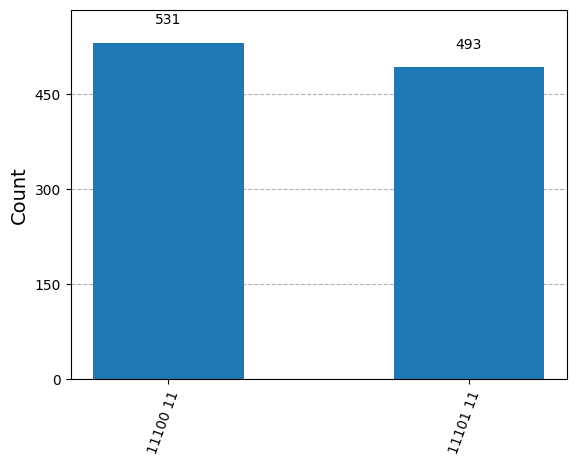

In [10]:
# Extract and plot the results
counts = result.get_counts()
plot_histogram(counts)
plt.show()

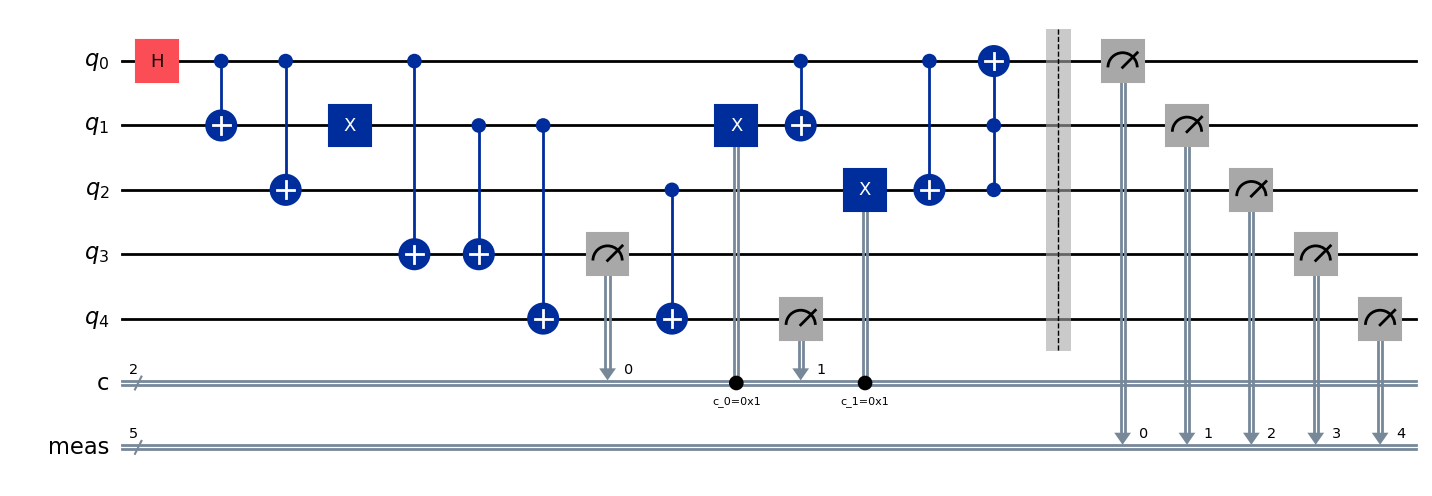

In [11]:
# Show the quantum circuit
qc.draw('mpl')
plt.show()